# Dependency code

In [1]:
import imp
import os
import sys
import numpy as np
import glob
import cmdbench

fp, pathname, description = imp.find_module('benchmark', ['../lib'])
benchmark = imp.load_module('benchmark', fp, pathname, description)

# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

# Software versions

In [2]:
!conda run --name mentalist mentalist -v

MentaLiST 0.2.4.




# Benchmark

## Input data and constants

In [3]:
input_dir = 'input'
output_dir = 'output'
db_dir = 'db/campy'
db = f'{db_dir}/campy.db'

nproc = 4

input_samples = [os.path.basename(f) for f in glob.glob(f'{input_dir}/*_1.fastq.gz')]
input_samples = [f.replace('_1.fastq.gz','') for f in input_samples]

benchmark.create_folder_if_doesnt_exist(db_dir)
benchmark.create_folder_if_doesnt_exist(output_dir)
benchmark.clean_if_exists(db_dir)
benchmark.clean_if_exists(output_dir)

#sample_sizes = [1,10,20,30,40,50,60,70,80]
sample_sizes = [3,10,15]

print(input_samples)

['MOD1_LS1005', 'CFSAN000961', 'CFSAN001112', 'CFSAN023467', 'CFSAN001115', 'CFSAN000970', 'MOD1_LS982', 'CFSAN000958', 'D7331', 'CFSAN000960', '2014D-0189', '2014C-3656', 'CFSAN001140', 'MOD1_LS1006', 'CFSAN023470', 'CFSAN023466', 'CFSAN000951', 'D7321', 'MOD1_LS997', 'CFSAN023464', '2014C-3907', 'PNUSA000195', 'CFSAN000752', 'CFSAN023469', 'CFSAN000661', 'CFSAN000191', 'PNUSAL000730', 'CFSAN000212', 'PNUSA000196', 'CFSAN023471', 'CFSAN000669', 'D7323', '2014D-0070', 'MOD1_LS1008', '2014D-0068', 'CFSAN023468', 'D7333', 'D7320', '2014C-3850', 'CFSAN000700', 'D7327', 'D7330', 'D5663', 'CFSAN023465', 'CFSAN000952', '2014C-3857', 'MOD1_LS1000', 'MOD1_LS995', 'CFSAN000189', 'MOD1_LS998', 'CFSAN000954', 'D7329', '2014C-3655', 'MOD1_LS996', 'D7316', 'CFSAN002349', 'MOD1_LS1004', 'MOD1_LS1010', 'MOD1_LS985', '2014D-0067', 'D7322', 'CFSAN000963', 'D7324', 'CFSAN023463', '2014C-3600', '2014C-3599', 'CFSAN000753', 'D7328', 'PNUSAL000870', 'MOD1_LS1011', 'CFSAN000968', 'PNUSAL000957', 'CFSAN00021

## Build MentaLiST database

In [4]:
!conda run --name mentalist mentalist download_pubmlst -k 31 -s 30 -o {db_dir}/fasta --db {db}

2020-10-05T11:32:26.7 - info: Downloading scheme for Campylobacter jejuni ... 
2020-10-05T11:32:26.928 - info: Downloading profile ...
Trying to download: https://rest.pubmlst.org/db/pubmlst_campylobacter_seqdef/schemes/1/profiles_csv
2020-10-05T11:32:29.848 - info: Downloading locus aspA ...
Trying to download: https://rest.pubmlst.org/db/pubmlst_campylobacter_seqdef/loci/aspA/alleles_fasta
2020-10-05T11:32:30.885 - info: Downloading locus glnA ...
Trying to download: https://rest.pubmlst.org/db/pubmlst_campylobacter_seqdef/loci/glnA/alleles_fasta
2020-10-05T11:32:30.886 - info: Downloading locus gltA ...
Trying to download: https://rest.pubmlst.org/db/pubmlst_campylobacter_seqdef/loci/gltA/alleles_fasta
2020-10-05T11:32:30.886 - info: Downloading locus glyA ...
Trying to download: https://rest.pubmlst.org/db/pubmlst_campylobacter_seqdef/loci/glyA/alleles_fasta
2020-10-05T11:32:30.886 - info: Downloading locus pgm ...
Trying to download: https://rest.pubmlst.org/db/pubmlst_campylobact

## Benchmark functions

In [5]:
def reset_func():
    pass

def sampling_func(sample_size):
    samples = input_samples[:sample_size]
    return samples

assemble_command = {
    "command": f"conda run --name mentalist mentalist call -o {output_dir}/%.txt --db {db} -1 {input_dir}/%_1.fastq.gz -2 {input_dir}/%_2.fastq.gz",
    "parallel_args": f"-j {nproc} -I%"
}

## Benchmark

In [6]:
multibench_results, debug_str = benchmark.multibench.multi_cmdbench({
        "call": [assemble_command]
    },
    reset_func = reset_func, iterations = 1, sampling_func = sampling_func, sample_sizes = sample_sizes, 
    benchmark_list_to_results = benchmark.benchmark_list_to_results, active_output_print = True
)

>>>>>>>>>>>>>
parallel -j 4 -I% conda run --name mentalist mentalist call -o output/%.txt --db db/campy/campy.db -1 input/%_1.fastq.gz -2 input/%_2.fastq.gz ::: MOD1_LS1005 CFSAN000961 CFSAN001112

STDOUT: 2020-10-05T11:32:47.876 - info: Opening kmer database ... 
2020-10-05T11:32:49.652 - info: Finished the JLD load.
2020-10-05T11:32:49.903 - info: Building kmer index ...
2020-10-05T11:32:50.104 - info: Sample: CFSAN001112. Opening fastq file(s) and counting kmers ... 
2020-10-05T11:33:47.846 - info: Voting for alleles ... 
2020-10-05T11:33:49.072 - info: Calling alleles and novel alleles ...
2020-10-05T11:33:49.784 - info: Writing output ...
2020-10-05T11:33:50.47 - info: Done.

2020-10-05T11:32:47.81 - info: Opening kmer database ... 
2020-10-05T11:32:49.583 - info: Finished the JLD load.
2020-10-05T11:32:49.835 - info: Building kmer index ...
2020-10-05T11:32:50.035 - info: Sample: CFSAN000961. Opening fastq file(s) and counting kmers ... 
2020-10-05T11:34:06.704 - info: Voting for

## Save and reload results

In [7]:
save_path = "mentalist-results.txt"

samples_per_sample_size = []
for sample_size in sample_sizes:
        samples_per_sample_size.append(input_samples[:sample_size])

benchmark.multibench.save_multibench_results(multibench_results, samples_per_sample_size, save_path)
multibench_results, samples_per_sample_size = benchmark.multibench.read_multibench_results(save_path)
print(samples_per_sample_size)

[['MOD1_LS1005,', 'CFSAN000961,', 'CFSAN001112'], ['MOD1_LS1005,', 'CFSAN000961,', 'CFSAN001112,', 'CFSAN023467,', 'CFSAN001115,', 'CFSAN000970,', 'MOD1_LS982,', 'CFSAN000958,', 'D7331,', 'CFSAN000960'], ['MOD1_LS1005,', 'CFSAN000961,', 'CFSAN001112,', 'CFSAN023467,', 'CFSAN001115,', 'CFSAN000970,', 'MOD1_LS982,', 'CFSAN000958,', 'D7331,', 'CFSAN000960,', '2014D-0189,', '2014C-3656,', 'CFSAN001140,', 'MOD1_LS1006,', 'CFSAN023470']]


# Plot

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

[{'runtime': 102.95, 'memory': 3951845376.0, 'disk_read': 779723670.0, 'disk_write': 4243747.0}, {'runtime': 346.96, 'memory': 7225184256.0, 'disk_read': 2893342547.0, 'disk_write': 12928223.0}, {'runtime': 415.52, 'memory': 9262579712.0, 'disk_read': 4202719827.0, 'disk_write': 18378384.0}]


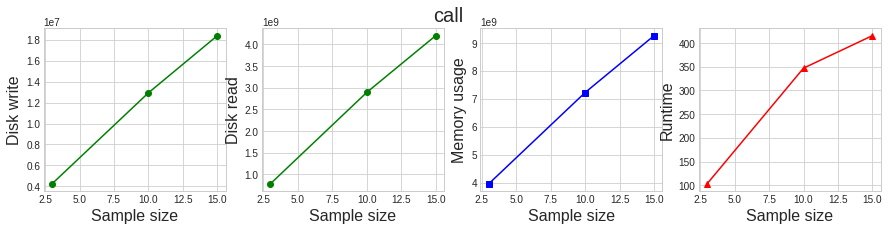

In [9]:
# Indexing Plots
benchmark.multibench.plot_resources(multibench_results, sample_sizes, "call")